# Looking at stacked generalization misclassifications

**Methods:**
>1. Load data
>2. Identify misclassifications
>3. Investigate

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.svm as skl_svm
import sklearn.cross_validation as skl_cv
import seaborn as sns
import os
import sys

base_path = '/home/lundi/Python/MNIST/'
sys.path.append(base_path + '/libraries/')

import time
import glob

import MNIST_data_processor as mdp
MNIST_data_processor = mdp.MNIST_data_processor()

## 1. Load data

In [2]:
X = pd.read_csv(base_path + 'data/prediction_results/2016.11.9-Stacked_Results.csv').set_index('datum_index')

## 2. Identify misclassifications

In [18]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val > 0.1 else 'black'
    return 'color: %s' % color

In [23]:
X.corr().transpose().style.applymap(color_negative_red)

In [3]:
X['is_misclassified'] = X['Actual'] != X['Prediction_Stacked']

misclassified_data = X.loc[X['is_misclassified']]

misclassified_data = misclassified_data[[ u'Actual', u'Prediction_Stacked', 
       u'is_misclassified', u'0|GBM', u'0|LR', u'0|RF', u'0|SVC_Poly', u'1|GBM', u'1|LR', u'1|RF',
       u'1|SVC_Poly', u'2|GBM', u'2|LR', u'2|RF', u'2|SVC_Poly', u'3|GBM',
       u'3|LR', u'3|RF', u'3|SVC_Poly', u'4|GBM', u'4|LR', u'4|RF',
       u'4|SVC_Poly', u'5|GBM', u'5|LR', u'5|RF', u'5|SVC_Poly', u'6|GBM',
       u'6|LR', u'6|RF', u'6|SVC_Poly', u'7|GBM', u'7|LR', u'7|RF',
       u'7|SVC_Poly', u'8|GBM', u'8|LR', u'8|RF', u'8|SVC_Poly', u'9|GBM',
       u'9|LR', u'9|RF', u'9|SVC_Poly']]

## 3. Investigate

In [4]:
current_actual = 2
current_misclassified_data = misclassified_data.loc[misclassified_data['Actual'] == current_actual,
                      ['Actual', 'Prediction_Stacked', '{actual}|GBM'.format(actual = current_actual), 
                        '{actual}|LR'.format(actual = current_actual),
                        '{actual}|RF'.format(actual = current_actual),
                        '{actual}|SVC_Poly'.format(actual = current_actual)]]

In [5]:
current_misclassified_data

,Actual,Prediction_Stacked,2|GBM,2|LR,2|RF,2|SVC_Poly
datum_index,,,,,,
73,2,3,0.72981,0.48756,0.43067,0.10833
104,2,8,0.03190,0.00452,0.25000,0.50902
397,2,8,0.00062,0.00417,0.17667,0.19348
459,2,7,0.00153,0.04607,0.12267,0.10413
644,2,7,0.00163,0.03968,0.13800,0.00897
808,2,7,0.05148,0.15078,0.13733,0.10610
821,2,8,0.90938,0.00367,0.10067,0.16576
1012,2,8,0.15603,0.04002,0.26933,0.27196
1147,2,1,0.16141,0.20740,0.30800,0.34836


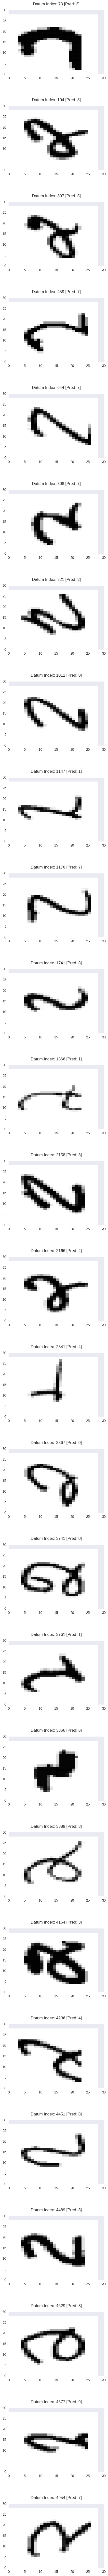

In [6]:
total_misclassified = current_misclassified_data.shape[0]

plt.figure(figsize=(5, 5 * total_misclassified))
plt.subplots_adjust(hspace = 0.5)
for plot_index, datum_index in enumerate(current_misclassified_data.index): 
    predicted_value = current_misclassified_data.loc[datum_index, 'Prediction_Stacked']
    plt.subplot(total_misclassified, 1, (plot_index + 1))
    MNIST_data_processor.show_number(datum_index, predicted_value)

In [8]:
misclassified_data.ix[104]

Actual                      2
Prediction_Stacked          8
is_misclassified         True
0|GBM                 0.00268
0|LR                  0.01609
0|RF                  0.07533
0|SVC_Poly            0.01449
1|GBM                 0.00025
1|LR                  0.00041
1|RF                  0.01133
1|SVC_Poly            0.00099
2|GBM                  0.0319
2|LR                  0.00452
2|RF                     0.25
2|SVC_Poly            0.50902
3|GBM                 0.00696
3|LR                    1e-05
3|RF                    0.028
3|SVC_Poly            0.00446
4|GBM                 0.09148
4|LR                  0.94584
4|RF                  0.14667
4|SVC_Poly            0.02591
5|GBM                 0.00872
5|LR                   0.0043
5|RF                     0.09
5|SVC_Poly            0.02814
6|GBM                 0.00551
6|LR                  0.00253
6|RF                  0.12267
6|SVC_Poly            0.00379
7|GBM                 0.00795
7|LR                    2e-05
7|RF      

## Let's look at some correctly classified value

In [12]:
correct_data = X.loc[~X['is_misclassified']]

correct_data = correct_data[[ u'Actual', u'Prediction_Stacked', 
       u'is_misclassified', u'0|GBM', u'0|LR', u'0|RF', u'0|SVC_Poly', u'1|GBM', u'1|LR', u'1|RF',
       u'1|SVC_Poly', u'2|GBM', u'2|LR', u'2|RF', u'2|SVC_Poly', u'3|GBM',
       u'3|LR', u'3|RF', u'3|SVC_Poly', u'4|GBM', u'4|LR', u'4|RF',
       u'4|SVC_Poly', u'5|GBM', u'5|LR', u'5|RF', u'5|SVC_Poly', u'6|GBM',
       u'6|LR', u'6|RF', u'6|SVC_Poly', u'7|GBM', u'7|LR', u'7|RF',
       u'7|SVC_Poly', u'8|GBM', u'8|LR', u'8|RF', u'8|SVC_Poly', u'9|GBM',
       u'9|LR', u'9|RF', u'9|SVC_Poly']]

correct_data = correct_data.loc[correct_data['Actual'] == 2].head(50)

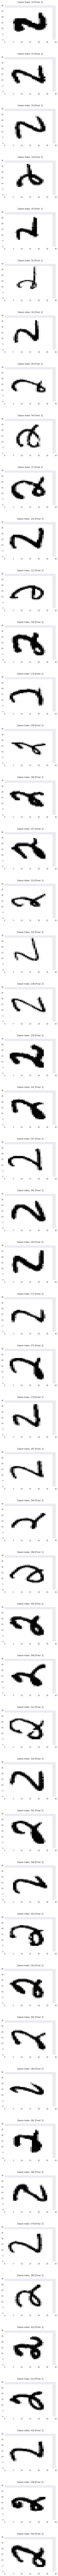

In [13]:
total = correct_data.shape[0]

plt.figure(figsize=(5, 5 * total))
plt.subplots_adjust(hspace = 0.5)
for plot_index, datum_index in enumerate(correct_data.index): 
    predicted_value = correct_data.loc[datum_index, 'Prediction_Stacked']
    plt.subplot(total, 1, (plot_index + 1))
    MNIST_data_processor.show_number(datum_index, predicted_value)